# **Day 3 of #100dDaysofML**

Ahmad Wahid

# **Pipelines**
* A sequence of data processing components is called a data pipeline. 
* It's very common in ML systems.
* Since there is a lot of data to manipulate and many data transformations to apply.
* Each component pulls in a large amount of data, process it, and spits out the result in another data store, and then after some time another compenent pulls in this data and spits out its own outputa, and so on. 
* If in case one component breaks down, the downstream components can often continue to run normally ( at least for while) by just using the last output from the broken component. This makes the architecture quite robust. Example:     

 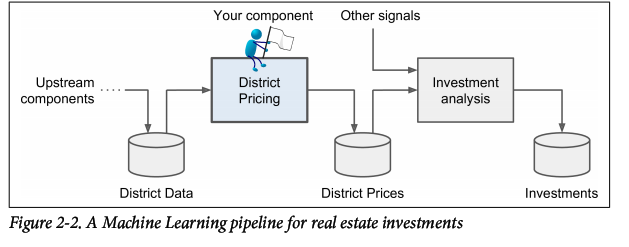

* On the other hand, the broken component can go unnoticed for a while if proper monitoring is not implemented. The data gets stale and the overall performance of the system drops.



## **Importing Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

## **Working On data**

In [8]:
data_set=pd.read_excel('Book1.xlsx')
data_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      1
total_rooms             1
total_bedrooms        208
population              1
households              1
median_income           1
median_house_value      1
ocean_proximity         1
dtype: int64

**-------------------------------------------------------------------------------------------**

**info()** method is useful to get a quick description of the data, in particular the total number of rows, and each attribute's type and non-null values. 


In [14]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20641 non-null  object 
 1   latitude            20641 non-null  object 
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.6+ MB


In [15]:
data_set['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**------------------------------------------------------------------------------------------**

**describe()** method shows a summary of the numerical attributes

In [16]:
data_set.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**------------------------------------------------------------------------------------------**

To feel more confident about the type of data that we are dealing with is to plot a histogram for each nummerical attribute.

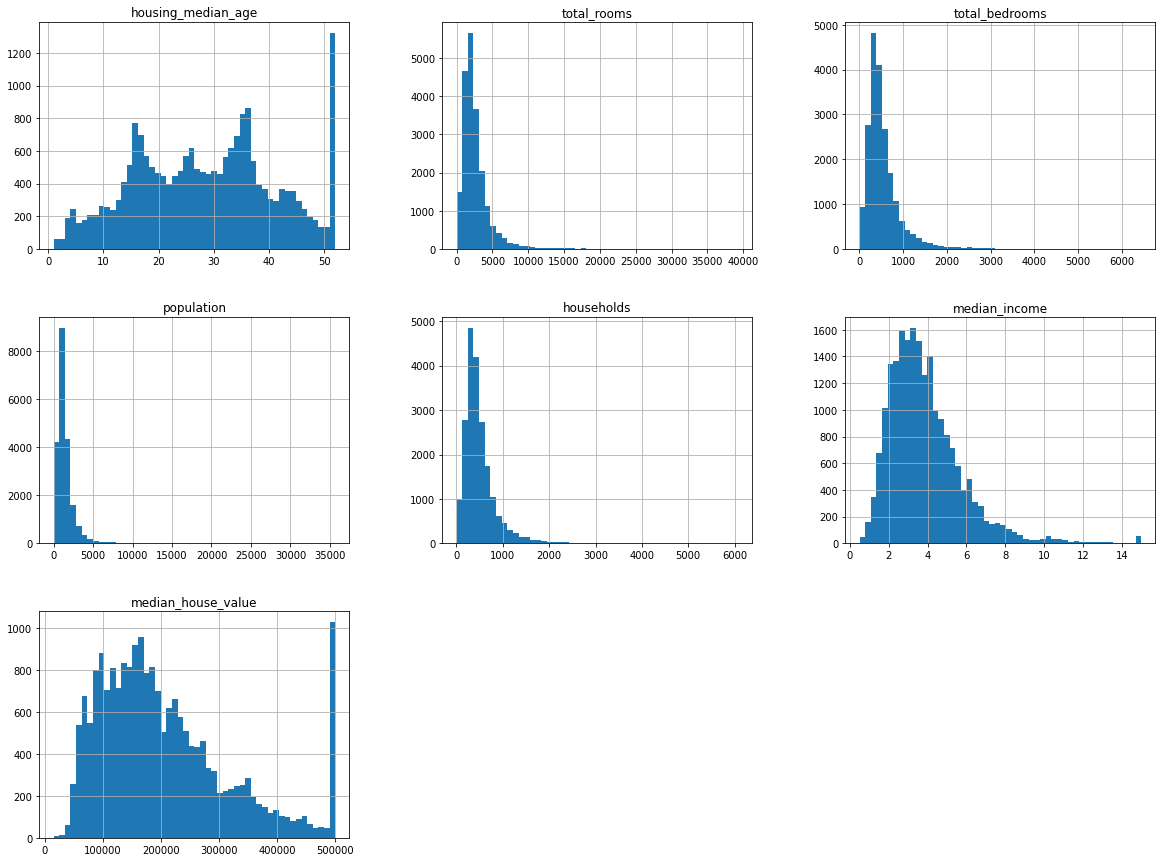

In [21]:
data_set.hist(bins=50,figsize=(20,15))
plt.show()

**-----------------------------------------------------------------------------------------**

**Create a Test set**

When we estimate the generalization error using the best set, our estimate will be too optimistic and we will launch a system that will not perform as well as expected. This is called data snooping bias.

In [69]:

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [71]:
train_set,test_set=split_train_test(data_set,0.2)
print(len(train_set))
print(len(test_set))

16513
4128


In [72]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

  

In [73]:
housing_with_id = data_set.reset_index()   # adds an `index` column
housing_with_id=housing_with_id.dropna(axis=0)
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [83]:
housing_with_id["id"] = data_set["longitude"] * 1000 + data_set["latitude"]
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,'id')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(data_set,test_size=0.2,random_state=42)


In [118]:
train_set,test_set=split_train_test(data_set,0.2)
print(len(train_set))
print(len(test_set))

16347
4086


On each run the dataset is randomly shuffled which will create a problem for us and the algorithm too. So therefore, to set random number generator's seed "(np.random.seed(42))"


In [48]:
data_set['income_cat']=pd.cut(data_set['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],
                              labels=[1,2,3,4,5])

# pd.cut() function is used to create an income category attribute with 5 categories (labeled from 1 to 5)
# category 1 ranges from 0 to 1.5(i.e., less than $15000), 
# category 2 ranges from 1.5 to 3 and so on;



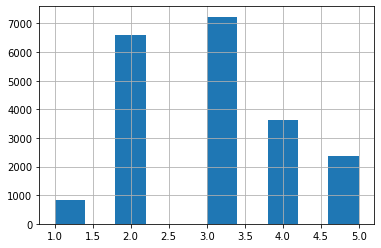

In [50]:
data_set['income_cat'].hist()

**Stratified random sampling** is the type of sampling in which the population is divided in sub-groups known as strata. Strata are homogenous.

In [89]:
data_set=data_set.dropna(axis=0)

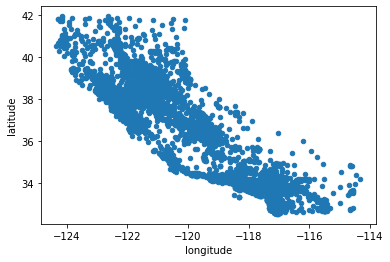

In [97]:
data_set.plot(kind='scatter',x='longitude',y='latitude')

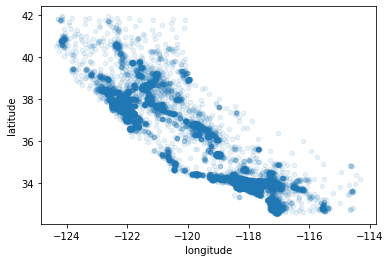

In [98]:
data_set.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

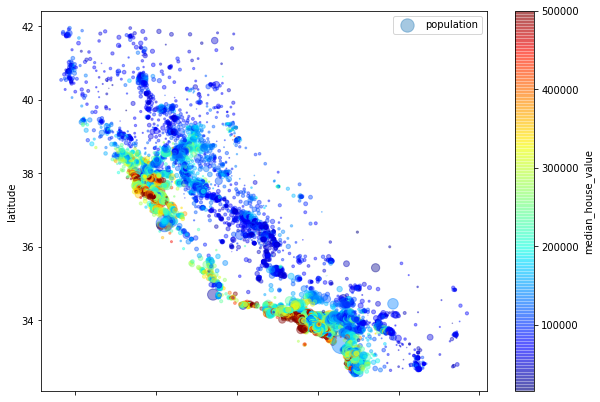

In [108]:
data_set.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
              s=data_set['population']/100,label='population',figsize=(10,7),
              c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()
plt.show()

**----------------------------------------------------------------------------------------**

**Looking for Correlations**

In [109]:
corr_matrix=data_set.corr()

In [111]:
corr_matrix

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [112]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
Name: median_house_value, dtype: float64

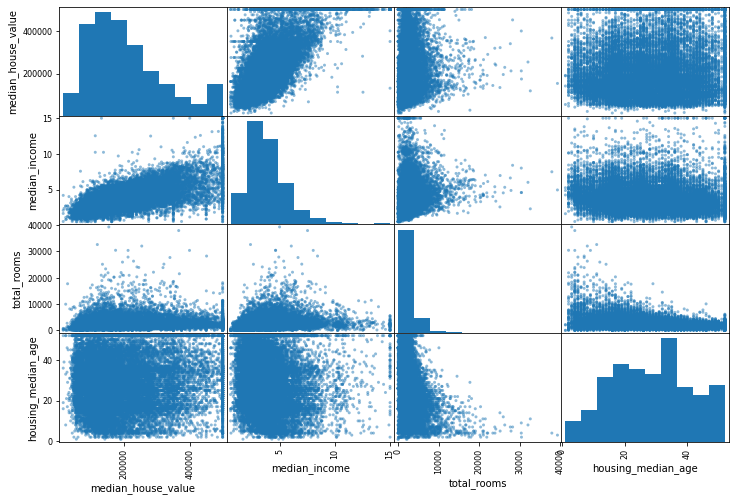

In [114]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value','median_income','total_rooms',
            'housing_median_age']
scatter_matrix(data_set[attributes],figsize=(12,8))
plt.show()

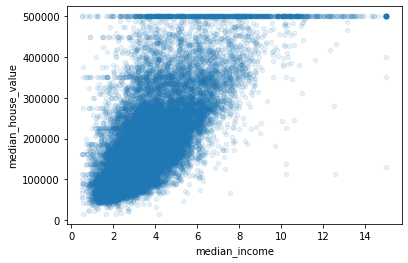

In [115]:
data_set.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

# **Next step is to prepare data for Machine learning algorithms**